<a href="https://colab.research.google.com/github/daniel-lorenzo/Electrotecnia/blob/master/TP1/Ejercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3
Se deja caer un bulto de masa $M$ de una altura $h$ sobre una plataforma montada sobre el sistema amortiguado cuyo resorte tiene una constante $k$. La plataforma tiene una masa $M_p$. Se considera choque completamente plástico.
1. Determinar el valor de la constante $c$ del amortiguador para que el sistema no oscile.
2. Para disminuir el impacto del bulto sobre la plataforma se decide disminuir el amortiguamiento, poniendo como condición que el conjunto oscile del 50% del $\delta_{est}$ (delta estático) en el menor tiempo posible.

## Solución

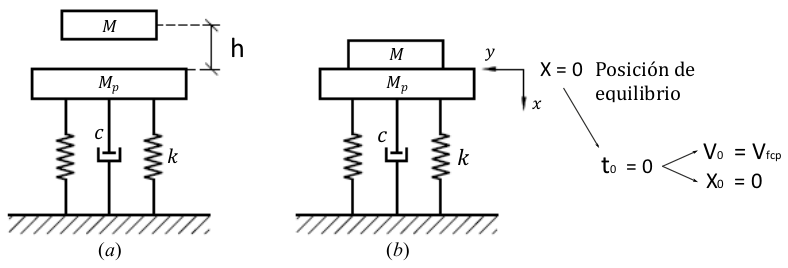

En la figura anterior se muestra el modelo mecánico del problema. Si se supone un choque totalmente plástico, cuando la masa $M$ impacta a la masa $M_P$, el conjunto adquirirá una cierta velocidad, que será la inicial de nuestro movimiento. Se cumple la condición de conservación de la cantidad de movimiento.

---
### 1) Determinar el valor de la constante $c$ del amortiguador para que el sistema no oscile.

In [1]:
# Datos: (Grupo 1)
M = 128     # [kg]    (masa)
h = 6       # [m]     (altura)
k = 25000   # [N/m]   (constante resorte)
M_P = 45    # [kg]    (masa de la plataforma)
g = 9.81    # [m/s^2] (aceleración de la gravedad)

In [2]:
import numpy as np

$$ M V_{M} + M_p V_p = (M + M_p) V_{conjunto} $$

$V_M = \sqrt{2gh}$    
$V_P = 0$

Velocidad del conjunto:
$$ V_{conj} = \frac{M \sqrt{2gh}}{M + M_P} $$

In [3]:
V_conj = (M*np.sqrt(2*g*h))/(M+M_P)
Vo = V_conj

In [4]:
print("Velocidad inicial del conjunto:")
print("Vo = %.4f [m/s]"%Vo)

Velocidad inicial del conjunto:
Vo = 8.0277 [m/s]


Si el sistema no oscila:
$$n = n_c = p = \sqrt{ \frac{k}{M + M_p} }$$

In [5]:
n = n_c = p = np.sqrt(k/(M + M_P))

In [6]:
print("n = n_c = p = %.4f [1/s]"%n)

n = n_c = p = 12.0212 [1/s]


In [7]:
# Masa total
M_T = M + M_P
# Cálculo de c
c = 2*n*M_T

In [8]:
#@title Constante c del amortiguador
print("Constante c del amortiguador:")
print('c = %.2f [kg/s]'%c)

Constante c del amortiguador:
c = 4159.33 [kg/s]


La ecuación que define el movimiento de un sistema libre amortiguado, está dada por:

$$ x_{(t)} = e^{-nt} \left[ x_0 \cos \left( \sqrt{p^2 - n^2} \cdot t \right) + \frac{x_0 n + V_0}{ \sqrt{p^2 - n^2} } \; \sin \left( \sqrt{p^2 - n^2} \cdot t \right) \right] \qquad \therefore \mbox{ con:} \; p^2 \leq n^2 $$

Para evitar indeterminaciones en la fórmula cuando $p^2 = n^2$, puede introducirse una ligera modificación:

$$ n = 0,99n_c $$

Obteniendo la ecuación para movimiento críticamente amortiguado:

$$ x_{(t)} = e^{-0,99 n_c t} \left[ d \cos \left( \sqrt{p^2 - (0,99n_c)^2} \cdot t \right) + \frac{0,99n_c d }{ \sqrt{p^2 - (0,99 n_c)^2} } \; \sin \left( \sqrt{p^2 - (0,99n_c)^2} \cdot t \right) \right] $$

$$ \mbox{con } x_0 = d \quad \wedge \quad V_0 = 0 $$

In [9]:
import matplotlib.pyplot as plt
from scipy.optimize import fmin

In [10]:
n = 0.99*n_c    # (para evitar indeterminación)

# Defino la función a graficar
def x(t):
  y = np.exp(-n*t)*(Vo/np.sqrt(p**2 - n**2)*np.sin(np.sqrt(p**2 - n**2)*t))
  return y

In [11]:
t = np.linspace(0,1,100)

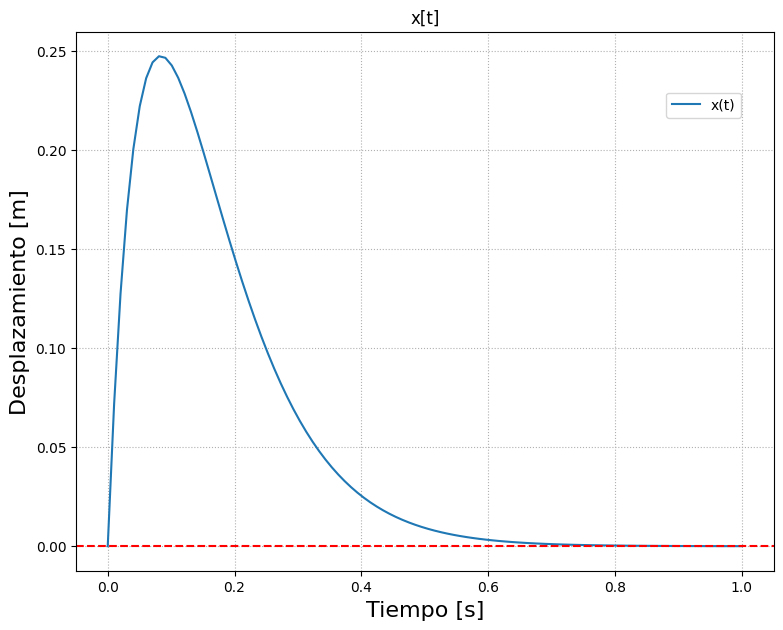

In [12]:
# Gráfica de la función
plt.figure(figsize=(9,7))
plt.title('x[t]')
plt.xlabel('Tiempo [s]', fontsize=16)
plt.ylabel('Desplazamiento [m]', fontsize=16)
plt.grid(linestyle=":")
plt.plot(t,x(t), label = "x(t)")
plt.axhline(y = 0, color = 'r', linestyle = '--')

plt.legend(bbox_to_anchor = (0.9, 0.9), loc = 'upper center')

plt.show()

---
### 2) Para disminuir el impacto del bulto sobre la plataforma se decide disminuir el amortiguamiento, poniendo como condición que el conjunto oscile del 50% de $\delta_{est}$ (delta estático) en el menor tiempo posible.

Para disminuir el impacto del bulto sobre la plataforma se decide disminuir el amortiguamiento, poniendo como condición que el conjunto oscile menos del 50% del delta estático en el menor tiempo posible.

Definiendo como deflexión estática a la distancia recorrida por la compresión de los muelles por la simple y única acción del peso de la plataforma, tenemos:

$$ \delta_{est} k = mg = g M_P $$

$$ \delta_{est} = \frac{g M_P}{k} $$

In [13]:
δ_est = (g*M_P)/k

In [14]:
print("Desplazamiento estimado:")
print("δ_est = %.5f [m]"%δ_est)

Desplazamiento estimado:
δ_est = 0.01766 [m]


La condición impuesta dice que la primera oscilación no puede superar el 50% del $\delta$ estático, es decir:

$$ \delta_{max} \leq 0,5 \delta_{est} $$

In [15]:
δ_max = 0.5*δ_est

In [16]:
print("Desplazamiento máximo:")
print("δ_max = %.6f [m]"%δ_max)

Desplazamiento máximo:
δ_max = 0.008829 [m]


Luego, para nuestro instante inicial analizado, la velocidad será $V_0 = V_{conjunto}$

El valor mínimo del amortiguamiento $c$ requerido para lograr el cumplimiento de la condición impuesta, se puede obtener de dos maneras diferentes, a saber:

1) Despejando el coeficiente $n$ de la expresión general, bajo el supuesto aproximado que la primera oscilación ocurre en el tiempo $t = \frac{3}{4} \, T$.

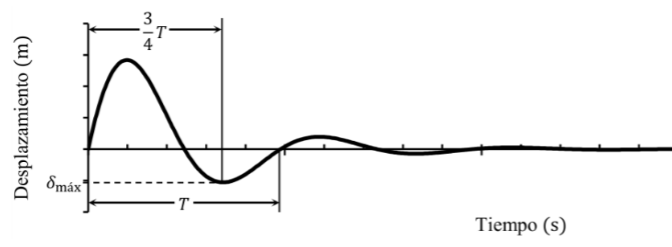

Debemos ahora obtener el período (pseudo período en realidad) del movimiento, pero resulta que para obtenerlo necesitamos el valor de $n$, por lo que haremos una aproximación calculando este factor con el período del movimiento sin amortiguación.

$$ p = \sqrt{\frac{k}{M+M_P}} \qquad \therefore \qquad T = \frac{2 \pi}{p} $$

2) Utilizando nuevamente la planilla de cálculo Excel: modificando el valor del amortiguamiento relativo $n/n_c$ en la hoja "gráficos", y observando la columna de desplazamiento $x$, hasta que el valor máximo negativo $-\delta_{max}$ no supere el 50% $\delta_{est}$. Cuando ocurra dicha condición, obtendremos automáticamente el amortiguamiento absoluto buscado, de manera de calcular el coeficiente de resistencia viscosa $c$ mediante la expresión conocida $c = 2 n (M + M_P)$

$$ x_{(t)} = e^{-n t} \left[ \frac{ V_0 }{ \sqrt{p^2 - n^2} } \sin \left( \sqrt{p^2 - n^2} \; t \right) \right] $$

$$ \mbox{con } x_0 = 0 $$

In [17]:
n = 0.75*n_c   # Probamos con un (n/n_c) = 0.75

In [18]:
print('n = %.4f [1/s]'%n)
print("n/n_c = %.2f"%(n/n_c))

n = 9.0159 [1/s]
n/n_c = 0.75


In [19]:
t = np.linspace(0,1,100)

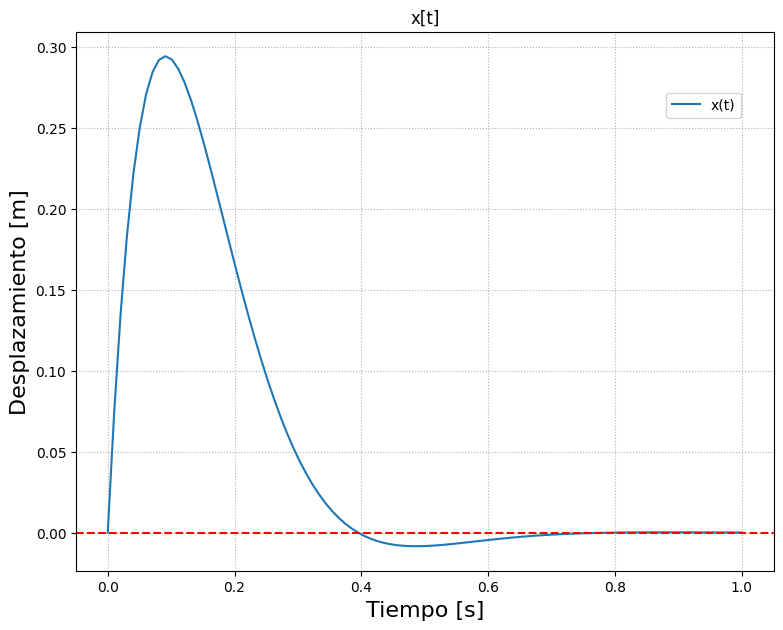

In [20]:
# Gráfica de la función
plt.figure(figsize=(9,7))
plt.title('x[t]')
plt.xlabel('Tiempo [s]', fontsize=16)
plt.ylabel('Desplazamiento [m]', fontsize=16)
plt.grid(linestyle=":")
plt.plot(t,x(t), label = "x(t)")
plt.axhline(y = 0, color = 'r', linestyle = '--')

plt.legend(bbox_to_anchor = (0.9, 0.9), loc = 'upper center')

plt.show()

In [21]:
# Busca un mínimo alrededor de t = 0.5 observado en el gráfico
fmin(x,0.5)

Optimization terminated successfully.
         Current function value: -0.008350
         Iterations: 10
         Function evaluations: 20


array([0.48603516])

<mark>Encuentra un mínimo en $t = 0,4860 \; \mathrm{s}$ con $x = |-0,00835 \; \mathrm{m}| < |\delta_{max}|$</mark>

In [22]:
#%reset -s -f